In [1]:
#import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('premiers.csv')
df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,...,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,...,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,1.92,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,...,1.71,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,...,1.71,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93


In [3]:
df.shape

(380, 106)

In [4]:
df.dtypes

Div           object
Date          object
Time          object
HomeTeam      object
AwayTeam      object
FTHG           int64
FTAG           int64
FTR           object
HTHG           int64
HTAG           int64
HTR           object
Referee       object
HS             int64
AS             int64
HST            int64
AST            int64
HF             int64
AF             int64
HC             int64
AC             int64
HY             int64
AY             int64
HR             int64
AR             int64
B365H        float64
B365D        float64
B365A        float64
BWH          float64
BWD          float64
BWA          float64
              ...   
PSCA         float64
WHCH         float64
WHCD         float64
WHCA         float64
VCCH         float64
VCCD         float64
VCCA         float64
MaxCH        float64
MaxCD        float64
MaxCA        float64
AvgCH        float64
AvgCD        float64
AvgCA        float64
B365C>2.5    float64
B365C<2.5    float64
PC>2.5       float64
PC<2.5       

In [5]:
df.isna().sum()

Div          0
Date         0
Time         0
HomeTeam     0
AwayTeam     0
FTHG         0
FTAG         0
FTR          0
HTHG         0
HTAG         0
HTR          0
Referee      0
HS           0
AS           0
HST          0
AST          0
HF           0
AF           0
HC           0
AC           0
HY           0
AY           0
HR           0
AR           0
B365H        0
B365D        0
B365A        0
BWH          0
BWD          0
BWA          0
            ..
PSCA         0
WHCH         0
WHCD         0
WHCA         0
VCCH         0
VCCD         0
VCCA         0
MaxCH        0
MaxCD        0
MaxCA        0
AvgCH        0
AvgCD        0
AvgCA        0
B365C>2.5    0
B365C<2.5    0
PC>2.5       0
PC<2.5       0
MaxC>2.5     0
MaxC<2.5     0
AvgC>2.5     0
AvgC<2.5     0
AHCh         0
B365CAHH     0
B365CAHA     0
PCAHH        0
PCAHA        0
MaxCAHH      0
MaxCAHA      0
AvgCAHH      0
AvgCAHA      0
Length: 106, dtype: int64

- Definisikan Masalah terkait bisnis yang ingin anda selesaikan (Define Business Problem)
- Definisikan Tujuan EDA anda (Define Goals)
- Analisa Deskriptif & Handling Missing Value serta Outliers 
- Analisis Data (Univariate dan Multivariate, Gunakan Crosstab atau Pivot_Table atau Group by )
- Visualisasi Data (Univariate dan Multivariate, Gunakan plot sesuai dengan fungsi dan tujuannya) 
- Temukan Insight data berdasarkan Analisis dan Visualisasi yang telah anda lakukan
- Kesimpulan dan Saran yang dapat anda berikan berdasarkan hasil EDA anda 

# Exploratory Data Analysis - Men's Shoes Prices
## Introduction
*Problem* : some television got confuse when there are two match play in the same time
*Goals* : so we decided help the provider which football match must be broadcast on television premier league 2020/2021,by considering the percentages of the winning match(home/away), etc

*analysis description*
- The dataset contains following fields:

    - Div : League Division
    - Date : Match Date (dd/mm/yy)
    - HomeTeam : Home Team
    - AwayTeam : Away Team
    - FTHG : Full Time Home Team Goals
    - FTAG : Full Time Away Team Goals
    - FTR : Full Time Result (H=Home Win, D=Draw, A=Away Win)
    - HTHG : Half Time Home Team Goals
    - HTAG : Half Time Away Team Goals
    - HTR : Half Time Result (H=Home Win, D=Draw, A=Away Win)
    - HS : Home Team Shots
    - AS : Away Team Shots
    - HST : Home Team Shots on Target
    - AST : Away Team Shots on Target
    - HF : Home Team Fouls Committed
    - AF : Away Tema Fouls Committed
    - HC : Home Team Corners
    - AC : Away Team Corners
    - HY : Home Team Yellow Cards
    - AY : Away Team Yellow Cards
    - HR : Home Team Red Cards
    - AR : Away Team Red Cards

## CLEANING DATA

In [6]:
#data setelah kolom 22 itu data untuk keperluan BET
df_new=df.iloc[:,:23]
df_new.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,...,12,7,5,9,9,11,2,0,2,0
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,...,14,3,9,6,13,1,1,2,2,0
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,8,3,3,10,19,3,4,2,1,0
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,...,11,4,3,6,12,2,7,0,0,0
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,...,10,2,3,16,14,6,2,2,1,0


In [7]:
df_new.dtypes

Div         object
Date        object
Time        object
HomeTeam    object
AwayTeam    object
FTHG         int64
FTAG         int64
FTR         object
HTHG         int64
HTAG         int64
HTR         object
Referee     object
HS           int64
AS           int64
HST          int64
AST          int64
HF           int64
AF           int64
HC           int64
AC           int64
HY           int64
AY           int64
HR           int64
dtype: object

- changing date types coloumn from object to date

In [8]:
df_new['Date'] = df_new['Date'].astype('datetime64')
df_new.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR
0,E0,2019-09-08,20:00,Liverpool,Norwich,4,1,H,4,0,...,12,7,5,9,9,11,2,0,2,0
1,E0,2019-10-08,12:30,West Ham,Man City,0,5,A,0,1,...,14,3,9,6,13,1,1,2,2,0
2,E0,2019-10-08,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,8,3,3,10,19,3,4,2,1,0
3,E0,2019-10-08,15:00,Burnley,Southampton,3,0,H,0,0,...,11,4,3,6,12,2,7,0,0,0
4,E0,2019-10-08,15:00,Crystal Palace,Everton,0,0,D,0,0,...,10,2,3,16,14,6,2,2,1,0


In [9]:
df_new.dtypes

Div                 object
Date        datetime64[ns]
Time                object
HomeTeam            object
AwayTeam            object
FTHG                 int64
FTAG                 int64
FTR                 object
HTHG                 int64
HTAG                 int64
HTR                 object
Referee             object
HS                   int64
AS                   int64
HST                  int64
AST                  int64
HF                   int64
AF                   int64
HC                   int64
AC                   int64
HY                   int64
AY                   int64
HR                   int64
dtype: object

In [10]:
df_new.drop('Div',axis=1,inplace=True)

In [11]:
df_new.shape

(380, 22)

In [12]:
#counting second half goal by home team
df_new.insert(9,'SHHG',df_new['FTHG'] - df_new['HTHG'])

In [13]:
#counting second half goal by away team
df_new.insert(10,'SHAG',df_new['FTAG'] - df_new['HTAG'])

In [14]:
team=df_new['HomeTeam'].unique()
team

array(['Liverpool', 'West Ham', 'Bournemouth', 'Burnley',
       'Crystal Palace', 'Watford', 'Tottenham', 'Leicester', 'Newcastle',
       'Man United', 'Arsenal', 'Aston Villa', 'Brighton', 'Everton',
       'Norwich', 'Southampton', 'Man City', 'Sheffield United',
       'Chelsea', 'Wolves'], dtype=object)

/Users/risyad/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


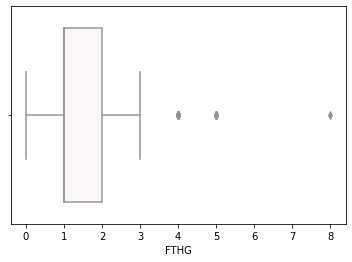

In [59]:
sns.boxplot(df_new['FTHG'],palette='vlag',data=df_new)

/Users/risyad/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


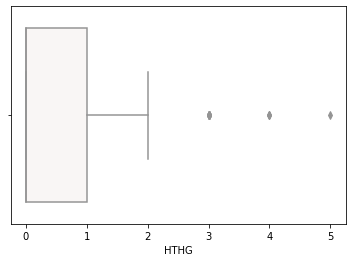

In [61]:
sns.boxplot(df_new['HTHG'],palette='vlag',data=df_new)

/Users/risyad/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


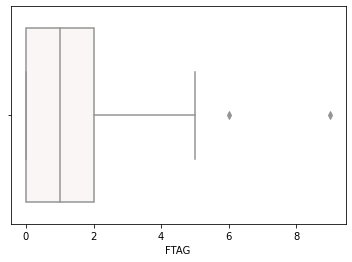

In [62]:
sns.boxplot(df_new['FTAG'],palette='vlag',data=df_new)

/Users/risyad/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


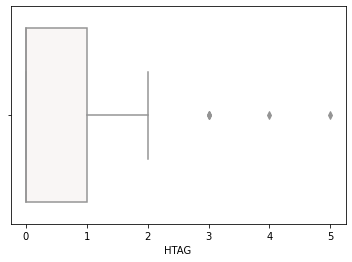

In [63]:
sns.boxplot(df_new['HTAG'],palette='vlag',data=df_new)

- the outliers doesnt bother the data because its normal if the team score goals more than 4

In [15]:
# function to make the league table
def make_league_table(team, df_new, side):
    ## side = home/away/all
    ## home = for preparing the home league table
    ## away = for preparing the away league table
    ## all = for preparing the main league table
    
    league_table = dict()
    ## dictionary will contain data for each club
    
    for club in team:
        ## iterate though club and fill in the values in league_table dictionary
        
        mp, w, d, l, gf, ga, gd, cs, pts = 0, 0, 0, 0, 0, 0, 0, 0, 0
        ## match played, win, draw, lose, goals for, goals against, goal difference, clean sheets, points
        
        for i in range(len(df)):
            ## will iterate through the whole dataset and compute all the results
            ## the if-else clause will check conditions for home and away teams
            ## and as per the condition will compute the required results
            if df.iloc[i]['HomeTeam'] == club and (side == 'home' or side == 'all'):
                ## when the club is a home team
                ## side parameter for checking whether we are trying to create home table or not
                ## if side is home then function will prepare the data for home league table
                if df.iloc[i]['FTR'] == 'H':
                    w += 1
                    pts += 3
                    ## when home team is winning
                    ## win will increase
                    ## points will increase
                    
                elif df.iloc[i]['FTR'] == 'A':
                    l += 1
                    ## when away team is winning
                    ## loss will increase
                    
                else:
                    d += 1
                    pts += 1
                    ## else the draw
                    ## draw will increase
                    ## points will increase by 1
                    
                gf += df.iloc[i]['FTHG']
                ga += df.iloc[i]['FTAG']
                ## calculating goals for and goals against value    
                
                if df.iloc[i]['FTAG'] == 0:
                    cs += 1
                ## calculating the clean sheets value
                
                mp += 1
                ## incrementing the matches played value
            
            elif df.iloc[i]['AwayTeam'] == club and (side == 'away' or side == 'all'):
                ## when the club is an away team
                ## side parameter for checking whether we are trying to create away table or not
                ## if side is away then function will prepare the data for away league table
                if df.iloc[i]['FTR'] == 'H':
                    l += 1
                    ## when home team is winning
                    ## loss will increase
                    
                elif df.iloc[i]['FTR'] == 'A':
                    w += 1
                    pts += 3
                    ## when away team is winning
                    ## win will increase
                    ## points will increase
                    
                else:
                    d += 1
                    pts += 1
                    ## else the draw
                    ## draw will increase
                    ## points will increase by 1
                
                gf += df.iloc[i]['FTAG']
                ga += df.iloc[i]['FTHG']
                ## calculating goals for and goals against value
                
                if df.iloc[i]['FTHG'] == 0:
                    cs += 1
                ## calculating the clean sheets value

                mp += 1
                ## incrementing the matches played value
        
        gd = gf - ga
        ## calculating the goal difference value
        
        ## every parameter for our table has now been calculated
        ## now will append the information in a dictionary
        
        league_table[club] = {'MP': mp, 'W': w, 'D': d, 'L': l, 'GF': gf, 'GA': ga, 'GD': gd, 'CS': cs, 'PTS': pts}
        ## appending all the parameters to the dictionary with key being the club name
    
    return league_table

# standing table

In [16]:
standing_table=make_league_table(team,df_new,side='all')
## make a dataframe for the league table
league_table_df = pd.DataFrame(standing_table)
## transpose the dataframe
league_table_df = league_table_df.transpose()
## set respective places for column values
league_table_df = league_table_df[['MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'CS', 'PTS']]

## reset index to have new column for Club
league_table_df = league_table_df.rename_axis('Club').reset_index()
## sort the dataframe by points
league_table_df.sort_values(by='PTS', ascending=False, inplace=True)

## reset index 
league_table_df.reset_index(inplace=True)
league_table_df.drop('index', axis=1, inplace=True)

In [17]:
league_table_df

,Club,MP,W,D,L,GF,GA,GD,CS,PTS
0,Liverpool,38,32,3,3,85,33,52,15,99
1,Man City,38,26,3,9,102,35,67,17,81
2,Chelsea,38,20,6,12,69,54,15,9,66
3,Man United,38,18,12,8,66,36,30,13,66
4,Leicester,38,18,8,12,67,41,26,13,62
5,Tottenham,38,16,11,11,61,47,14,8,59
6,Wolves,38,15,14,9,51,40,11,13,59
7,Arsenal,38,14,14,10,56,48,8,10,56
8,Burnley,38,15,9,14,43,50,-7,15,54
9,Sheffield United,38,14,12,12,39,39,0,13,54


# Exploratory Data Analysis

    - Teams qualified for UCL

In [65]:
df_new.dtypes

Date        datetime64[ns]
Time                object
HomeTeam            object
AwayTeam            object
FTHG                 int64
FTAG                 int64
FTR                 object
HTHG                 int64
HTAG                 int64
SHHG                 int64
SHAG                 int64
HTR                 object
Referee             object
HS                   int64
AS                   int64
HST                  int64
AST                  int64
HF                   int64
AF                   int64
HC                   int64
AC                   int64
HY                   int64
AY                   int64
HR                   int64
dtype: object

In [68]:
pd.crosstab(index=[df_new['HomeTeam'],df_new['AwayTeam']],columns=df_new['FTR'])

FTR                           A  D  H
HomeTeam    AwayTeam                 
Arsenal     Aston Villa       0  0  1
            Bournemouth       0  0  1
            Brighton          1  0  0
            Burnley           0  0  1
            Chelsea           1  0  0
            Crystal Palace    0  1  0
            Everton           0  0  1
            Leicester         0  1  0
            Liverpool         0  0  1
            Man City          1  0  0
            Man United        0  0  1
            Newcastle         0  0  1
            Norwich           0  0  1
            Sheffield United  0  1  0
            Southampton       0  1  0
            Tottenham         0  1  0
            Watford           0  0  1
            West Ham          0  0  1
            Wolves            0  1  0
Aston Villa Arsenal           0  0  1
            Bournemouth       1  0  0
            Brighton          0  0  1
            Burnley           0  1  0
            Chelsea           1  0  0
            Crystal Palace    0  0  1
            Everton           0  0  1
            Leicester         1  0  0
            Liverpool         1  0  0
            Man City          1  0  0
            Man United        1  0  0
...                          .. .. ..
West Ham    Leicester         1  0  0
            Liverpool         1  0  0
            Man City          1  0  0
            Man United        0  0  1
            Newcastle         1  0  0
            Norwich           0  0  1
            Sheffield United  0  1  0
            Southampton       0  0  1
            Tottenham         1  0  0
            Watford           0  0  1
            Wolves            1  0  0
Wolves      Arsenal           1  0  0
            Aston Villa       0  0  1
            Bournemouth       0  0  1
            Brighton          0  1  0
            Burnley           0  1  0
            Chelsea           1  0  0
            Crystal Palace    0  0  1
            Everton           0  0  1
            Leicester         0  1  0
            Liverpool         1  0  0
            Man City          0  0  1
            Man United        0  1  0
            Newcastle         0  1  0
            Norwich           0  0  1
            Sheffield United  0  1  0
            Southampton       0  1  0
            Tottenham         1  0  0
            Watford           0  0  1
            West Ham          0  0  1

[380 rows x 3 columns]

- we can see from the data that the result from the team result while playing at home

In [69]:
pd.crosstab(index=[df_new['AwayTeam'],df_new['HomeTeam']],columns=df_new['FTR'])

FTR                           A  D  H
AwayTeam    HomeTeam                 
Arsenal     Aston Villa       0  0  1
            Bournemouth       0  1  0
            Brighton          0  0  1
            Burnley           0  1  0
            Chelsea           0  1  0
            Crystal Palace    0  1  0
            Everton           0  1  0
            Leicester         0  0  1
            Liverpool         0  0  1
            Man City          0  0  1
            Man United        0  1  0
            Newcastle         1  0  0
            Norwich           0  1  0
            Sheffield United  0  0  1
            Southampton       1  0  0
            Tottenham         0  0  1
            Watford           0  1  0
            West Ham          1  0  0
            Wolves            1  0  0
Aston Villa Arsenal           0  0  1
            Bournemouth       0  0  1
            Brighton          0  1  0
            Burnley           1  0  0
            Chelsea           0  0  1
            Crystal Palace    0  0  1
            Everton           0  1  0
            Leicester         0  0  1
            Liverpool         0  0  1
            Man City          0  0  1
            Man United        0  1  0
...                          .. .. ..
West Ham    Leicester         0  0  1
            Liverpool         0  0  1
            Man City          0  0  1
            Man United        0  1  0
            Newcastle         0  1  0
            Norwich           1  0  0
            Sheffield United  0  0  1
            Southampton       1  0  0
            Tottenham         0  0  1
            Watford           1  0  0
            Wolves            0  0  1
Wolves      Arsenal           0  1  0
            Aston Villa       1  0  0
            Bournemouth       1  0  0
            Brighton          0  1  0
            Burnley           0  1  0
            Chelsea           0  0  1
            Crystal Palace    0  1  0
            Everton           0  0  1
            Leicester         0  1  0
            Liverpool         0  0  1
            Man City          1  0  0
            Man United        0  1  0
            Newcastle         0  1  0
            Norwich           1  0  0
            Sheffield United  0  0  1
            Southampton       1  0  0
            Tottenham         1  0  0
            Watford           0  0  1
            West Ham          1  0  0

[380 rows x 3 columns]

- we can see from the data that the result from the team result while playing at away

In [18]:
#TEAMS PLAYS FOR UCL FOR NEXT YEAR
league_table_df.iloc[:4]

,Club,MP,W,D,L,GF,GA,GD,CS,PTS
0,Liverpool,38,32,3,3,85,33,52,15,99
1,Man City,38,26,3,9,102,35,67,17,81
2,Chelsea,38,20,6,12,69,54,15,9,66
3,Man United,38,18,12,8,66,36,30,13,66


In [19]:
away_standing_table=make_league_table(team,df_new,side='away')
## make a dataframe for the league table
away_table_df = pd.DataFrame(away_standing_table)
## transpose the dataframe
away_table_df = away_table_df.transpose()
## set respective places for column values
away_table_df = away_table_df[['MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'CS', 'PTS']]

## reset index to have new column for Club
away_table_df = away_table_df.rename_axis('Club').reset_index()
## sort the dataframe by points
away_table_df.sort_values(by='PTS', ascending=False, inplace=True)

## reset index 
away_table_df.reset_index(inplace=True)
away_table_df.drop('index', axis=1, inplace=True)

In [20]:
away_table_df

,Club,MP,W,D,L,GF,GA,GD,CS,PTS
0,Liverpool,19,14,2,3,33,17,16,8,44
1,Man City,19,11,1,7,45,22,23,7,34
2,Southampton,19,9,4,6,30,25,5,6,31
3,Chelsea,19,9,3,7,39,38,1,1,30
4,Man United,19,8,5,6,26,19,7,6,29
5,Wolves,19,7,7,5,24,21,3,5,28
6,Burnley,19,7,5,7,19,27,-8,7,26
7,Leicester,19,7,4,8,32,24,8,5,25
8,Sheffield United,19,4,9,6,15,24,-9,5,21
9,Tottenham,19,4,8,7,25,30,-5,2,20


In [22]:
home_standing_table=make_league_table(team,df_new,side='home')
## make a dataframe for the league table
home_table_df = pd.DataFrame(home_standing_table)
## transpose the dataframe
home_table_df = home_table_df.transpose()
## set respective places for column values
home_table_df = home_table_df[['MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'CS', 'PTS']]

## reset index to have new column for Club
home_table_df = home_table_df.rename_axis('Club').reset_index()
home_table_df.sort_values(by='PTS', ascending=False, inplace=True)

## reset index 
home_table_df.reset_index(inplace=True)
home_table_df.drop('index', axis=1, inplace=True)

In [23]:
home_table_df

,Club,MP,W,D,L,GF,GA,GD,CS,PTS
0,Liverpool,19,18,1,0,52,16,36,7,55
1,Man City,19,15,2,2,57,13,44,10,47
2,Tottenham,19,12,3,4,36,17,19,6,39
3,Man United,19,10,7,2,40,17,23,7,37
4,Leicester,19,11,4,4,35,17,18,8,37
5,Chelsea,19,11,3,5,30,16,14,8,36
6,Arsenal,19,10,6,3,36,24,12,5,36
7,Sheffield United,19,10,3,6,24,15,9,8,33
8,Everton,19,8,7,4,24,21,3,6,31
9,Wolves,19,8,7,4,27,19,8,8,31


## most goals scored throughout the season

In [25]:
print(f"total goals scored throughout the season = {sum(df_new['FTAG']+df_new['FTHG'])}")

total goals scored throughout the season = 1034


## top six teams with the most number of goals

In [28]:
league_table_df.sort_values('GF',ascending=False)

,Club,MP,W,D,L,GF,GA,GD,CS,PTS
1,Man City,38,26,3,9,102,35,67,17,81
0,Liverpool,38,32,3,3,85,33,52,15,99
2,Chelsea,38,20,6,12,69,54,15,9,66
4,Leicester,38,18,8,12,67,41,26,13,62
3,Man United,38,18,12,8,66,36,30,13,66
5,Tottenham,38,16,11,11,61,47,14,8,59
7,Arsenal,38,14,14,10,56,48,8,10,56
10,Southampton,38,15,7,16,51,60,-9,9,52
6,Wolves,38,15,14,9,51,40,11,13,59
15,West Ham,38,10,9,19,49,62,-13,7,39


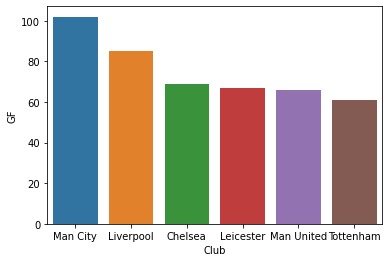

In [33]:
sns.barplot(x='Club',y='GF',data=league_table_df.sort_values('GF',ascending=False)[:6])

- manchester city has the highest scored number in season 2019/2020, following in the second place is the champions of england with 85 goals, there is an underdog team, its leicester city. they score more goals than manchester united and tottenham

# Top five with the least number of goals

In [36]:
league_table_df.sort_values('GF',ascending=True)

,Club,MP,W,D,L,GF,GA,GD,CS,PTS
19,Norwich,38,5,6,27,26,75,-49,5,21
13,Crystal Palace,38,11,10,17,31,50,-19,10,43
17,Watford,38,8,10,20,36,64,-28,9,34
12,Newcastle,38,11,11,16,38,58,-20,11,44
14,Brighton,38,9,14,15,39,54,-15,9,41
9,Sheffield United,38,14,12,12,39,39,0,13,54
18,Bournemouth,38,9,7,22,40,65,-25,5,34
16,Aston Villa,38,9,8,21,41,67,-26,7,35
8,Burnley,38,15,9,14,43,50,-7,15,54
11,Everton,38,13,10,15,44,56,-12,9,49


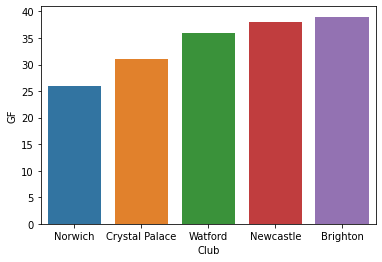

In [35]:
sns.barplot(x='Club',y='GF',data=league_table_df.sort_values('GF',ascending=True)[:5])

    - we can see from data below that norwich deserved to get that with 26 goals scorer because they are in the bottom of the league too, following by crystal palca ,watford,newcastle and brighton

# Top six which conceded least number of goals

In [37]:
league_table_df.sort_values('GA',ascending=True)

,Club,MP,W,D,L,GF,GA,GD,CS,PTS
0,Liverpool,38,32,3,3,85,33,52,15,99
1,Man City,38,26,3,9,102,35,67,17,81
3,Man United,38,18,12,8,66,36,30,13,66
9,Sheffield United,38,14,12,12,39,39,0,13,54
6,Wolves,38,15,14,9,51,40,11,13,59
4,Leicester,38,18,8,12,67,41,26,13,62
5,Tottenham,38,16,11,11,61,47,14,8,59
7,Arsenal,38,14,14,10,56,48,8,10,56
8,Burnley,38,15,9,14,43,50,-7,15,54
13,Crystal Palace,38,11,10,17,31,50,-19,10,43


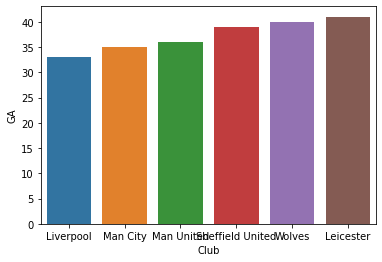

In [40]:
sns.barplot(x='Club',y='GA',data=league_table_df.sort_values('GA',ascending=True)[:6])

    - this is why liverpool can be the champions of england, they have a wall in their defense they only conceded 33 goals in one season. following with manchester city, united, sheffield ,wolves and leicester

# TOP SIX TEAM WITH THE MOST CLEAN SHEET

In [42]:
league_table_df.sort_values('CS',ascending=False)

,Club,MP,W,D,L,GF,GA,GD,CS,PTS
1,Man City,38,26,3,9,102,35,67,17,81
0,Liverpool,38,32,3,3,85,33,52,15,99
8,Burnley,38,15,9,14,43,50,-7,15,54
3,Man United,38,18,12,8,66,36,30,13,66
4,Leicester,38,18,8,12,67,41,26,13,62
6,Wolves,38,15,14,9,51,40,11,13,59
9,Sheffield United,38,14,12,12,39,39,0,13,54
12,Newcastle,38,11,11,16,38,58,-20,11,44
7,Arsenal,38,14,14,10,56,48,8,10,56
13,Crystal Palace,38,11,10,17,31,50,-19,10,43


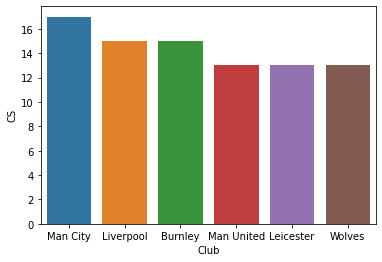

In [43]:
sns.barplot(x='Club',y='CS',data=league_table_df.sort_values('CS',ascending=False)[:6])

    - there is nothing change with the position on the number one and two, it domination with liverpool and manchester city, but we can see the underdog team in that visualization, there is burnley and wolves

# the most team with the most number of home wins,away wins,home loss and away losses

In [46]:
df_new.head()

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,SHHG,...,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR
0,2019-09-08,20:00,Liverpool,Norwich,4,1,H,4,0,0,...,12,7,5,9,9,11,2,0,2,0
1,2019-10-08,12:30,West Ham,Man City,0,5,A,0,1,0,...,14,3,9,6,13,1,1,2,2,0
2,2019-10-08,15:00,Bournemouth,Sheffield United,1,1,D,0,0,1,...,8,3,3,10,19,3,4,2,1,0
3,2019-10-08,15:00,Burnley,Southampton,3,0,H,0,0,3,...,11,4,3,6,12,2,7,0,0,0
4,2019-10-08,15:00,Crystal Palace,Everton,0,0,D,0,0,0,...,10,2,3,16,14,6,2,2,1,0


In [47]:
def home_away(df,homes,aways):
    homes_dict={}
    away_dict={}
    for club in team:
        home=0
        away=0
        home=sum(df_new[df_new['HomeTeam']==club]['FTR']==homes)#calculating home win/loss
        away=sum(df_new[df_new['AwayTeam']==club]['FTR']==aways)#calculating away win/loss
        
        homes_dict[club]=home
        away_dict[club]=away
        
    return (homes_dict,away_dict)

In [48]:
#show wins 
home_wins,away_wins=home_away(df=df_new,homes='H',aways='A')

In [49]:
home_loss,away_loss=home_away(df=df_new,homes='A',aways='H')

In [50]:
#home wins
pd.Series(home_wins).sort_values(ascending=False)[:5]

Liverpool    18
Man City     15
Tottenham    12
Leicester    11
Chelsea      11
dtype: int64

In [51]:
#away wins
pd.Series(away_wins).sort_values(ascending=False)[:5]

Liverpool      14
Man City       11
Southampton     9
Chelsea         9
Man United      8
dtype: int64

In [53]:
#home loss
pd.Series(home_loss).sort_values(ascending=False)[:5]

Norwich        12
Southampton    10
Aston Villa     9
West Ham        9
Bournemouth     8
dtype: int64

In [55]:
#away loss
pd.Series(away_loss).sort_values(ascending=False)[:5]

Norwich        15
Bournemouth    14
Watford        13
Aston Villa    12
Everton        11
dtype: int64

# Temukan Insight data berdasarkan Analisis dan Visualisasi yang telah anda lakukan
- the data show us about teams statistic in premier league 2019/2020,we can count the team statistic goals to view the statistic. and also we can see why these team got relegated, because the dataset served the away loss, home loss team, so it can visualize it

# Conclusion
- we can conclude that the top two of the premier league final table did realy well in their home and away matches, they looks very consistant in every aspect. cleansheet, goals, etc.the relegation teams one of the problem why they got relegated they did not have a consistant performance at away matches. especially norwich , they did not have a consistent performance at home match and away match
- I think the best way to be a champion of the league just have a good defense system, because liverpool,city, and united. we can see they are on the list, top six of the best cleansheet in premier league 2019/2020

# suggestion
- another thing, we can say it help provider to broadcast the match for the next season, because if the teeam has a good statistics. sometime, we can see that from the home win, I think if the home team always win every match at home its must always be broadcast on television.
- and we can see from the statistic above, the supporter love to watch the team who plays a pretty game in defense and offense, so this should be prioritized for broadcast